In [2]:
import urllib.request
import json

In [3]:
url = 'https://jsonplaceholder.typicode.com/posts/1'
req = urllib.request.Request(url)

In [4]:
r = urllib.request.urlopen(req).read()
cont = json.loads(r.decode('utf-8'))

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [5]:
cont

NameError: name 'cont' is not defined

In [6]:
cont['body']

'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'

In [6]:
url = 'http://localhost:3000/analytics'
req = urllib.request.Request(url)

In [7]:
r = urllib.request.urlopen(req).read()
cont = json.loads(r.decode('utf-8'))

In [8]:
cont['delayed_per_hour']

{'0': 3060,
 '1': 703,
 '10': 2523,
 '11': 2488,
 '12': 2455,
 '13': 2573,
 '14': 2565,
 '15': 2762,
 '16': 3450,
 '17': 5961,
 '18': 8240,
 '19': 5865,
 '2': 324,
 '20': 3708,
 '21': 2846,
 '22': 2831,
 '23': 3519,
 '3': 264,
 '4': 214,
 '5': 1077,
 '6': 2577,
 '7': 4834,
 '8': 3708,
 '9': 2641}

In [9]:
import pandas as pd

In [10]:
analytics = pd.read_json(path_or_buf=url)

In [11]:
analytics

,delayed_per_hour,tot_per_hour
0,3060,32422
1,703,5054
10,2523,90242
11,2488,92339
12,2455,93883
13,2573,98518
14,2565,97545
15,2762,98338
16,3450,104866
17,5961,114361


In [12]:
analytics.delayed_per_hour

0     3060
1      703
10    2523
11    2488
12    2455
13    2573
14    2565
15    2762
16    3450
17    5961
18    8240
19    5865
2      324
20    3708
21    2846
22    2831
23    3519
3      264
4      214
5     1077
6     2577
7     4834
8     3708
9     2641
Name: delayed_per_hour, dtype: int64

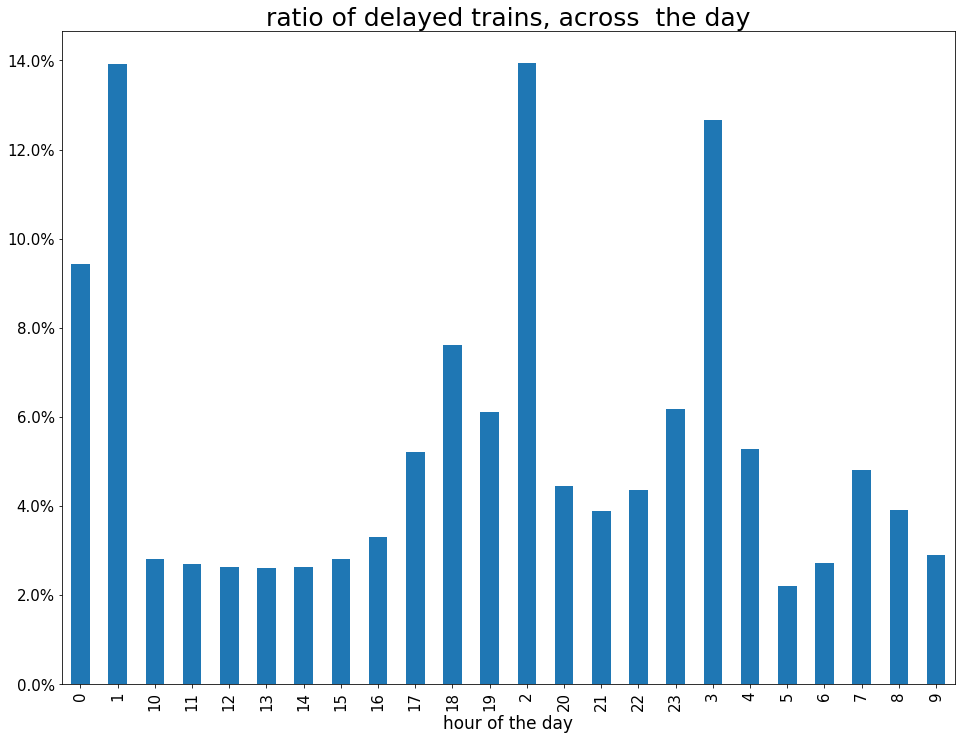

In [13]:
import numpy as np
import pandas as pd
import datetime
from itertools import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
from matplotlib import mlab
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
%matplotlib inline

def to_percent(y, position):
    s = str(100 * y)
    return s + '%'
    
formatter_percent = FuncFormatter(to_percent)

plot_delay_dist = (analytics.delayed_per_hour/analytics.tot_per_hour).plot(kind='bar', figsize=(16,12))
plot_delay_dist.set_xlabel("hour of the day", fontsize=17)
plot_delay_dist.set_title('ratio of delayed trains, across  the day', fontsize=25)
plot_delay_dist.tick_params(axis='both', which='major', labelsize=15)
plot_delay_dist.yaxis.set_major_formatter(formatter_percent)